# Superstore Sales Data Analysis
Data Source: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### Key Questions:
1. Which 5 Cities Have the Highest Total Sales? <br>
a. What Are the Top 5 Sub-Categories Purchased Most in the Top 10 Cities by Total Sales? <br>
b. What Are the Most Common Ship Modes in the Top 10 Cities by Total Sales? <br>
c. Which Customer Segment Dominates in the Top 10 Cities by Total Sales? <br>

2. How Has Sales Growth Evolved by Category From 2015-2018?
3. How Has Sales Growth Evolved by Sub-Category From 2015-2018?
4. Has the Sales Distribution Across Segments Changed From 2015-2018?
5. Which States Are Most Profitable vs Least Profitable?

##### Data Preparation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [7]:
df = pd.read_csv("../data/train.csv")

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [10]:
df.shape

(9800, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [12]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


##### Data Preprocessing

In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
dtype: int64

In [15]:
df[df['Postal_Code'].isnull()]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [16]:
df['Postal_Code'] = df['Postal_Code'].fillna(5401)

In [17]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y")
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format="%d/%m/%Y")

##### Which 10 Cities Have the Highest Total Sales?

In [18]:
top_10_city_sales = df[['City', 'Sales']]
top_10_city_sales = top_10_city_sales.groupby('City').sum()
top_10_city_sales = top_10_city_sales.sort_values(by='Sales', ascending=False).head(10).reset_index()
top_10_city_sales

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


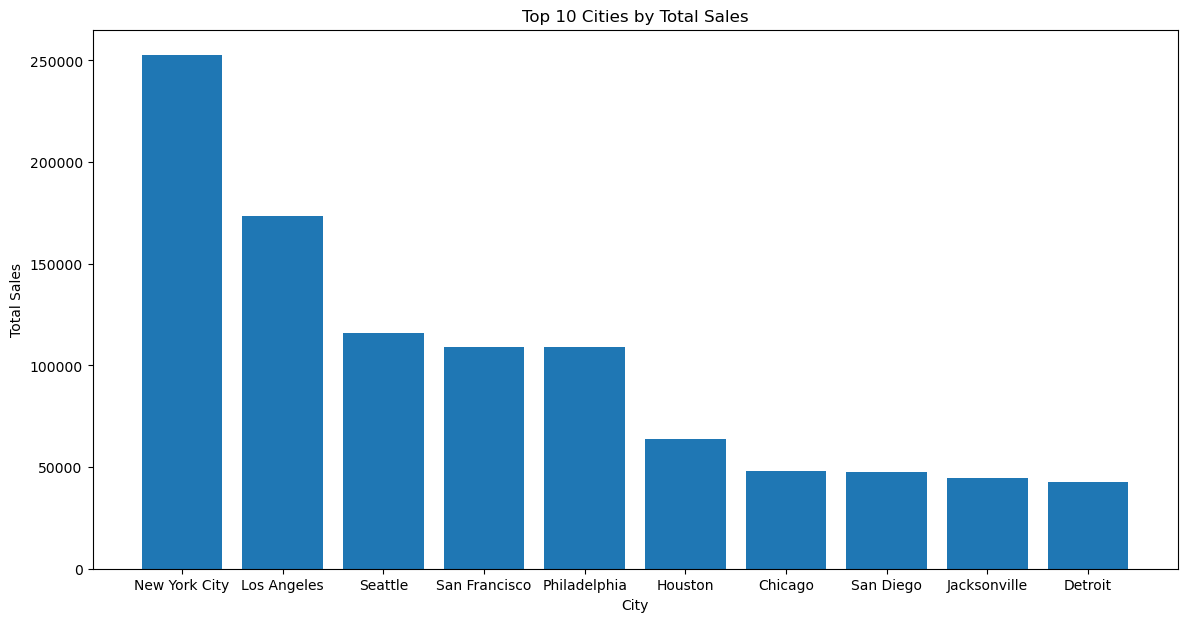

In [19]:
plt.figure(figsize=(14, 7))
plt.bar(top_10_city_sales['City'], top_10_city_sales['Sales'])
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

Q: Which 10 Cities Have the Highest Total Sales? <br>
<p>New York City dominates the market with the highest sales of $252k. Followed by Los Angeles with total sales of $173k sales as the second-highest. The sales are highly concentrated on these 2 cities, with the rest of the top 10 cities contributing significantly less.</p>

##### What Are the Top 5 Sub-Categories Purchased Most In the Top 10 Cities by Total Sales?

In [20]:
top_10_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).index
df_in_top_10_city = df[df['City'].isin(top_10_city)]
top_10_city_subcategory = df_in_top_10_city.groupby('Sub-Category')['Sales'].sum()
top_10_city_subcategory = top_10_city_subcategory.sort_values(ascending=False).head(5).reset_index()
top_10_city_subcategory

,Sub-Category,Sales
0,Chairs,147150.407
1,Phones,142377.638
2,Machines,109212.418
3,Storage,89969.044
4,Tables,82380.229


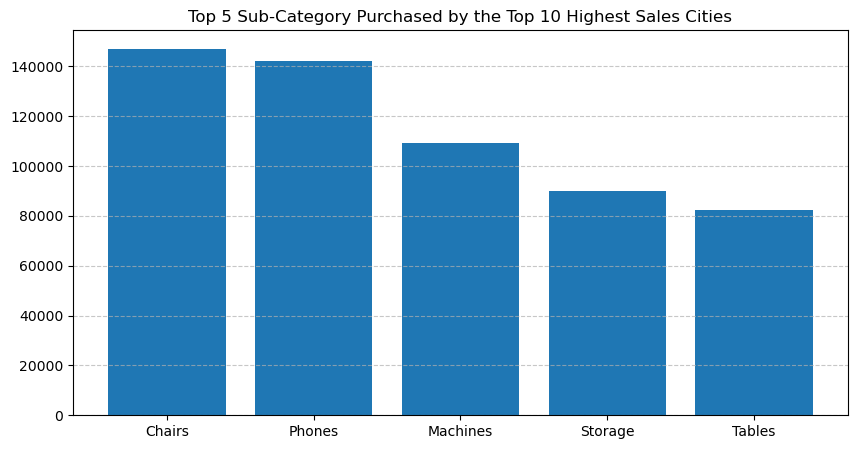

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_city_subcategory['Sub-Category'], top_10_city_subcategory['Sales'])
plt.title("Top 5 Sub-Category Purchased by the Top 10 Highest Sales Cities")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Q: What Are the Top 5 Sub-Categories Purchased Most In the Top 10 Cities by Total Sales? <br>
<p>Chairs and Phones sub-category sold the most products at $147k and $142k sales, respectively, with a difference of only $5k sales. Followed by Machines with $109k sales, a drop of approximately 23% - 25% compared to Chairs and Phones. Lastly, the fourth and fifth most sold sub-categories are Storage and Tables at $89k and $82k sales. </p>

##### What Are the Most Common Ship Modes in the Top 10 Cities by Total Sales?

In [22]:
top_10_city_ship_modes = df_in_top_10_city.groupby('Ship_Mode')['Sales'].sum()
top_10_city_ship_modes = top_10_city_ship_modes.sort_values(ascending=False).head(5).reset_index()
top_10_city_ship_modes

,Ship_Mode,Sales
0,Standard Class,570433.4609
1,Second Class,196101.6986
2,First Class,188677.3633
3,Same Day,51116.8280


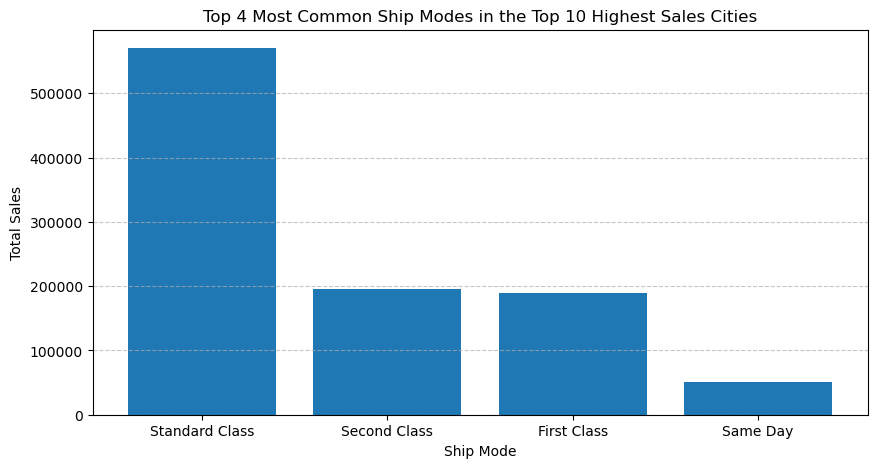

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_city_ship_modes['Ship_Mode'], top_10_city_ship_modes['Sales'])
plt.title("Top 4 Most Common Ship Modes in the Top 10 Highest Sales Cities")
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Q: What Are the Most Common Ship Modes in the Top 10 Cities by Total Sales? <br>
<p>Standard Class dominates with $570k sales, far ahead of the others. Second Class ($196k) shows a drop of 65.6% compared with Standard Class, while First Class ($188k) is slightly lower with a drop of 66.9% drop. The lowest contributor is Same Day shipping ($51k), which is 91% lower than Standard Class. This illustrates the significant sales gap between shipping modes.</p>

##### Which Customer Segment Dominates in the Top 10 Cities by Total Sales?

In [24]:
top_10_city_segment = df.groupby('Segment')['Sales'].sum()
top_10_city_segment.apply(lambda x: f"{x:,.2f}").reset_index()

,Segment,Sales
0,Consumer,"1,148,060.53"
1,Corporate,"688,494.07"
2,Home Office,"424,982.18"


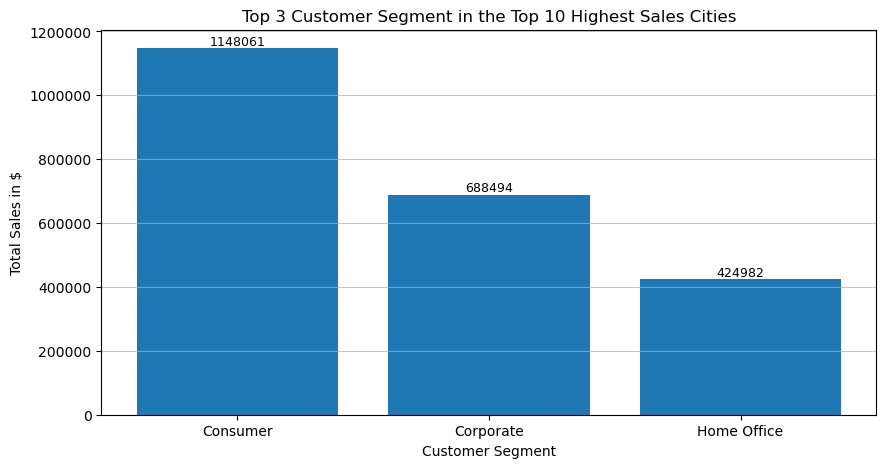

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_city_segment.index, top_10_city_segment.values)

for i, value in enumerate(top_10_city_segment.values):
    plt.text(i, value, f"{value:.0f}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Customer Segment")
plt.ylabel("Total Sales in $")
plt.title("Top 3 Customer Segment in the Top 10 Highest Sales Cities")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.7, axis='y')
plt.show()

Q: Which Customer Segment Dominates in the Top 10 Cities by Total Sales? <br>
<p>Customer Segment leads the market with total sales of $1.14M, significantly outperforming Corporate Segment, which recorded sales of $682k sales or 40% lower than the Customer sales. Meanwhile, the Home Office lags behind both, with the lowest sales of only $423k sales, making it the weakest performer among the three segments. </p>

##### How Has Sales Growth Evolved by Category From 2015-2018?

In [26]:
df['Year'] = df['Order_Date'].dt.year

In [27]:
sales_growth_by_category = df.groupby(['Category', 'Year'])['Sales'].sum().reset_index()
sales_growth_by_category

,Category,Year,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


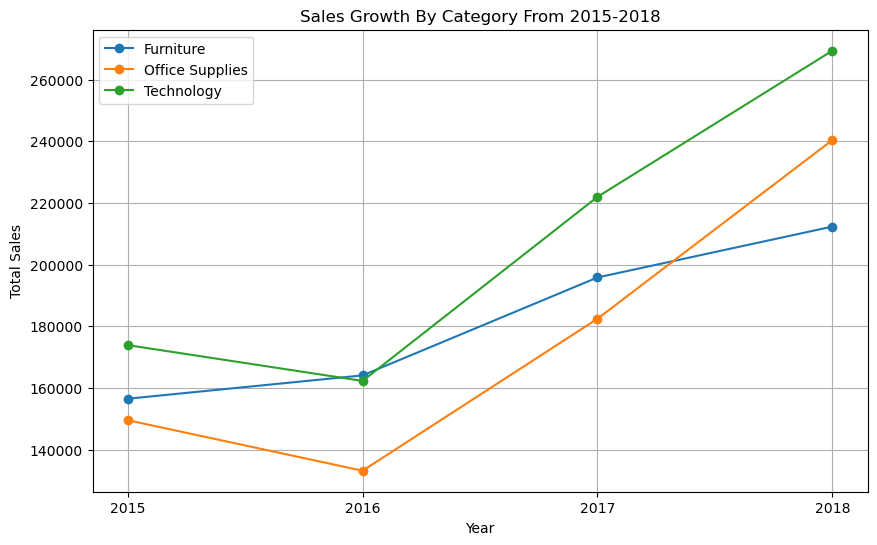

In [28]:
categories = sales_growth_by_category['Category'].unique()

plt.figure(figsize=(10, 6))

for cat in categories:
    df_category = sales_growth_by_category[sales_growth_by_category['Category'] == cat]
    plt.plot(df_category['Year'], df_category['Sales'], marker='o', label=cat)

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Growth By Category From 2015-2018")
plt.legend()
plt.grid(True)

plt.xticks(sales_growth_by_category['Year'].unique(),
           sales_growth_by_category['Year'].unique().astype(str))

plt.show()

Q: How Has Sales Growth Evolved by Category From 2015-2018? <br>
<p>Overall, From 2015-2018, Furniture, Office Supplies and Technology category sales have significantly increases, though with different pattern. Technology consistently outperformed other category, growing from $173k sales in 2015 to $269k in 2018. Office Supplies saw a pretty significant dip in 2016 from $149k in 2015 to $133k sales, but rebounded strongly, ending at $240k in 2018. Lastly, Furniture has a steady sales growth, rising from $156k in 2015 to $212k sales in 2018.</p>

##### How Has Sales Growth Evolved by Sub-Category From 2015-2018?

In [29]:
sales_growth_by_subcategory = df.groupby(['Sub-Category', 'Year'])['Sales'].sum().reset_index()

c:\Users\Ander\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Ander\AppData\Local\Temp\ipykernel_24492\3821947584.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


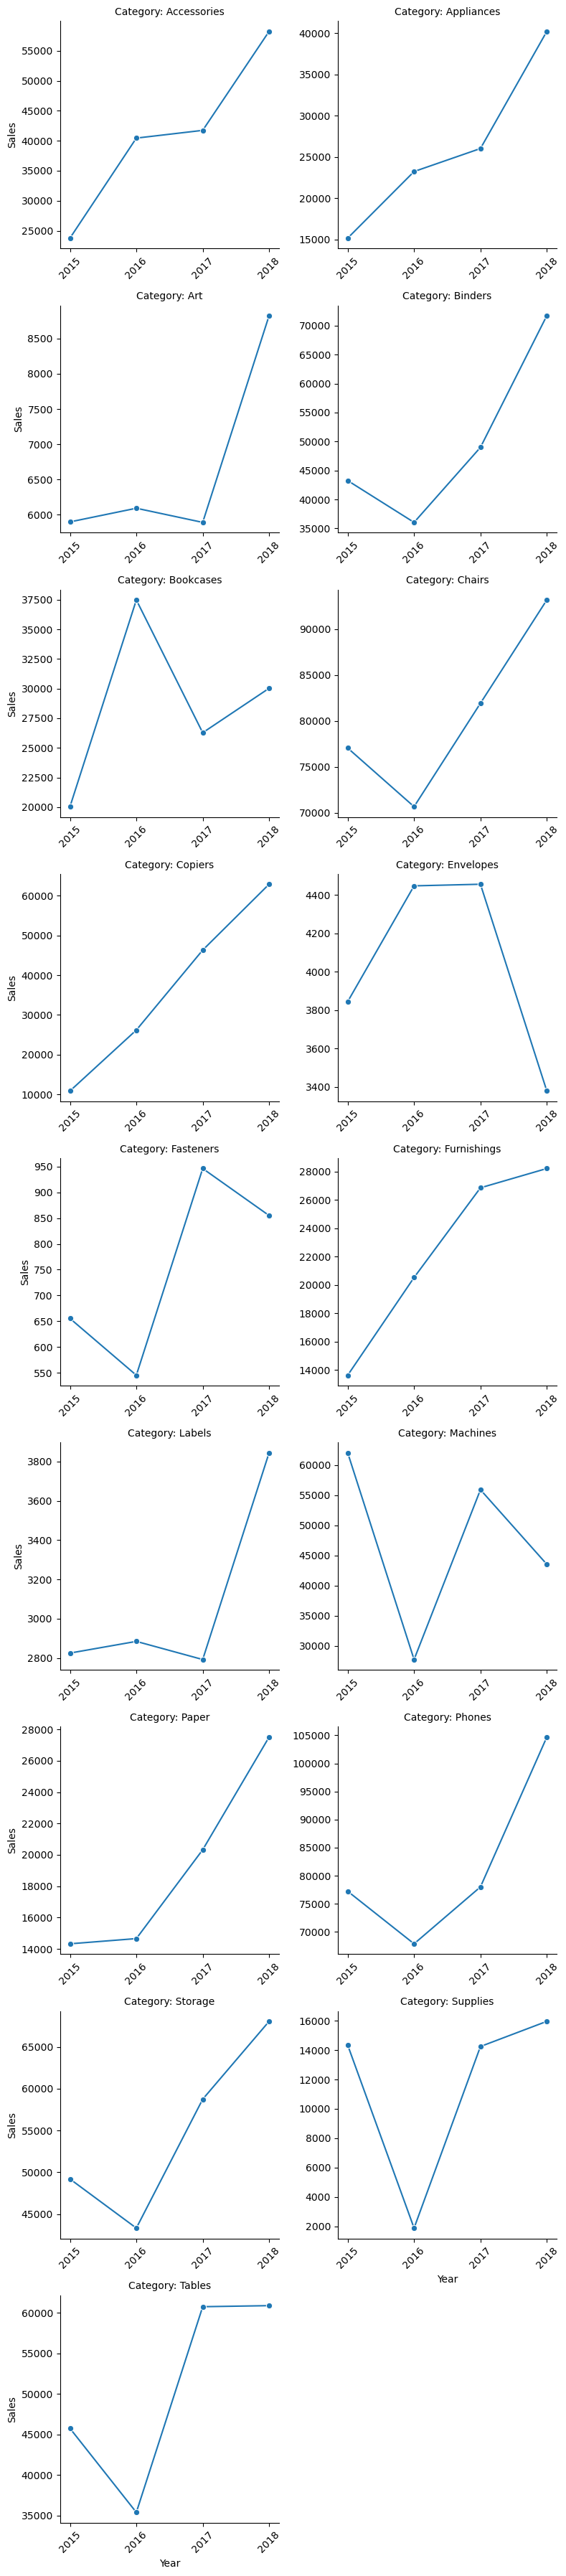

In [30]:
plot = sns.FacetGrid(sales_growth_by_subcategory, col='Sub-Category', col_wrap=2, height=4, sharey=False, sharex=False)
plot.map_dataframe(sns.lineplot, x='Year', y='Sales', marker='o')
plot.set_axis_labels("Year", 'Sales')
plot.set_titles("Category: {col_name}")

years = sorted(sales_growth_by_subcategory['Year'].unique())
for ax in plot.axes.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

Q: How Has Sales Growth Evolved by Sub-Category From 2015-2018? <br>
<p>Most sub-categories showed positive growth, with Phones, Copiers, Chairs, and Binders driving the strongest increases. Some categories like Machines, Envelopes, and Supplies fluctuated, while smaller items such as Fasteners and Labels remained relatively flat. Overall, technology and high-demand office products led the growth, while niche items grew more modestly.</p>

##### Has the Sales Distribution Across Segments Changed From 2015-2018?

In [31]:
sales_growth_by_segments = df.groupby(['Segment', 'Year'])['Sales'].sum().reset_index()

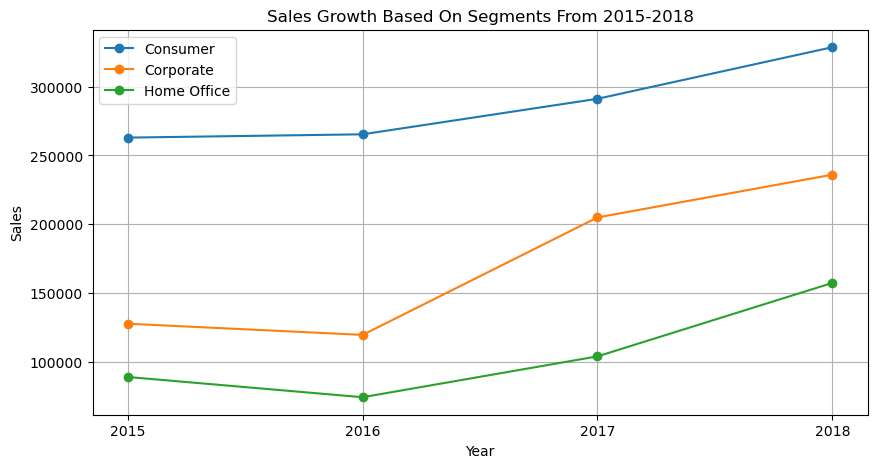

In [32]:
segment_category = sales_growth_by_segments['Segment'].unique()

plt.figure(figsize=(10, 5))

for segments in segment_category:
    df_segment = sales_growth_by_segments[sales_growth_by_segments['Segment'] == segments]
    plt.plot(df_segment['Year'], df_segment['Sales'], marker='o', label=segments)

plt.xticks(sales_growth_by_segments['Year'].unique(),
           sales_growth_by_segments['Year'].unique().astype(str))

plt.title("Sales Growth Based On Segments From 2015-2018")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

Q: Has the Sales Distribution Across Segments Changed From 2015-2018? <br>
<p>The Consumer segment consistently led in sales, growing steadily from 2015 to 2018. The Corporate segment showed slower growth at first but experienced strong momentum after 2016, narrowing the gap with Consumer. The Home Office segment remained the smallest, but it also rebounded strongly after 2016, nearly doubling by 2018. Overall, all three segments showed upward trends, with Consumer maintaining dominance.</p>

##### Which States Are Most Profitable vs Least Profitable?

In [33]:
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
    'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA',
    'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA',
    'Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD',
    'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
    'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
    'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH',
    'Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC',
    'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
    'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

df['State_Code'] = df['State'].map(us_state_abbrev)

In [34]:
sales_based_on_city = df.groupby(['State_Code', 'State'])['Sales'].sum().reset_index()

In [35]:
fig = px.choropleth(
    sales_based_on_city,
    locations='State_Code',
    locationmode='USA-states',
    color="Sales",
    scope="usa",
    color_continuous_scale="Viridis_r",
    hover_name="State",
    hover_data=["Sales"],
    title="Superstore Sales Distribution Across US States"
)

fig.show()

In [36]:
sales_based_on_states = df.groupby('State')['Sales'].sum().reset_index()
least_profitable_states = sales_based_on_states.loc[sales_based_on_states['Sales'].idxmin()]
most_profitable_states = sales_based_on_states.loc[sales_based_on_states['Sales'].idxmax()]

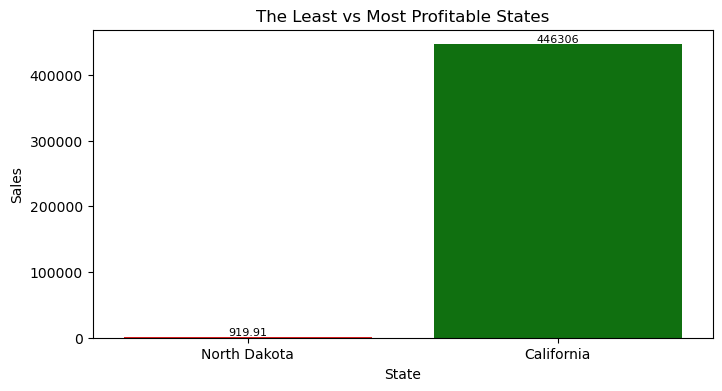

In [37]:
comparison = pd.DataFrame([least_profitable_states, most_profitable_states])

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=comparison, x='State', y='Sales', palette=['red', 'green'])
ax.bar_label(ax.containers[0], fontsize=8, rotation=0)
plt.title("The Least vs Most Profitable States")
plt.show()

Q: Which States Are Most Profitable vs Least Profitable? <br>
<p>out of all US states, California has the highest sales of $446k, making it the most profitable states in the United States. Meanwhile, North Dakota has the lowest sales of $919, which is 99.7% lower than California. This massive gap highlights how sales are heavily concentrated in key markets like California, whereas smaller states contribute minimally to overall performance.</p>

##### Final Conclusion
- Most Profitable States: California leads, while North Dakota is the least profitable.
- Top City by Sales: New York ($252k) and Los Angeles ($173k) dominate, far ahead of Seattle ($116k), San Fransisco ($109k), Philadelphia ($108k), Houston ($63k), Chicago ($47k), San Diego ($47k), Jacksonville ($44k) and Detroit ($42k). 
- Within Top Cities:
    - Best-Selling Category: Chairs ($147k), Phones ($142k), Machines ($109k), Storage ($89k) and Tables ($82k)  
    - Shipping Preference: Standard Class ($570k), followed by Second Class ($196k), First Class ($188k) and Same Day ($51k)
    - Segment: Customer segment ($1.14M) dominates the market, followed by Corporate segment ($682k) and Home Office segment ($423k)
- Sales Growth (2015-2018):
    - Categories: Technology grew from $173k in 2015 to $269k in 2018 (+55%), while Office Supplies grew from $149k in 2015 to $240k in 2018 (+60%). Lastly, Furniture grew from $156k in 2015 to $212k in 2018 (+36%).
    - Sub-Categories: Phones, Chairs, Copiers, and Binders sales grew significantly from 2015 to 2018. Meanwhile, products such as Machines, Envelopes, and Supplies have fluctuating sales. Lastly, smaller products, such as Fasteners and Labels, stayed largely unchanged.
    - Segments: The Customer segment stayed ahead of the other segments in sales. The corporate segment tried to close the gap with the Customer segment, even though it faced a slight decrease in 2016. Lastly, the Home Office segment nearly doubled the sales in 2018 compared to 2015, but still has a long way to reach the other two segments.  